# Quself Example

In [8]:
import Quself as qs # import Quself
import quantum_algorithm as qa # import quantum algorithm library based on quself
qs.version

1.2

### Quantum gates powered by Quself

In [9]:
qs.help

('I',
 'H',
 'X',
 'Y',
 'Z',
 'S',
 'T',
 'SQRT_X',
 'U',
 'RX',
 'RY',
 'RZ',
 'CNOT',
 'CY',
 'CZ',
 'CS',
 'SWAP',
 'TOFFOLI')

### Initialize Quantum Circuit

In [10]:
A = qs.Qcircuit(2) # qs.Qcircuit(number of qubits) 
A.base # current quantum states

array([[1],
       [0],
       [0],
       [0]])

### Applying quantum gates
<img src="회로.png" width="50%" height="50%">
    * If the above circuit is implemented with Quself, it is as follows.

In [11]:
A.X(0) # qs.X
A.H(1) # qs.H
A.Z(0) # qs.Z
A.X(1)
A.H(0)
A.CNOT(0,1) # qs.CNOT(control qubit, target qubit)
A.base

array([[-0.5],
       [-0.5],
       [ 0.5],
       [ 0.5]])

### Visualization

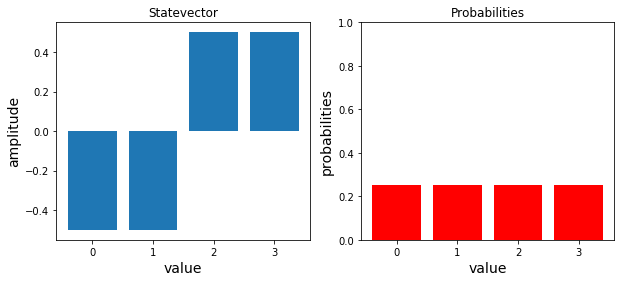

In [13]:
A.graph() # Shows the probability amplitude and probability of the current quantum state.

### Visualizing measurements and measurement results

한번 측정해서 얻은 값:  2


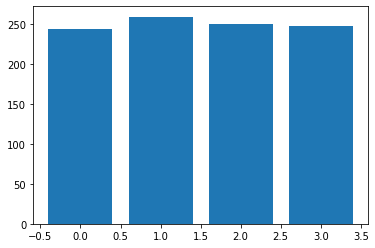

In [16]:
measure_once = np.argmax(A.Measure(1)) # qs.Measure (number of measurements) = Creates a list by increasing the index of the measured result value by 1.
print("한번 측정해서 얻은 값: ",measure_once)
A.M_graph(A.Measure(1000)) # It measures 1000 times and visualizes the result.

# Quantum algorithm application example

### Quantum random number generation

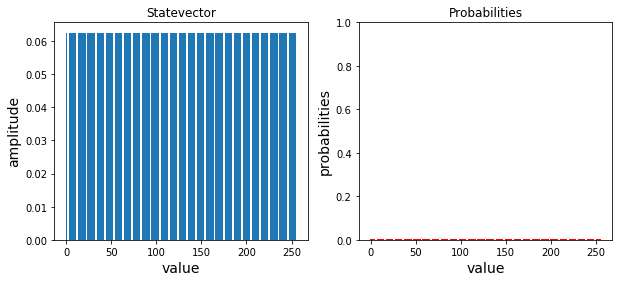

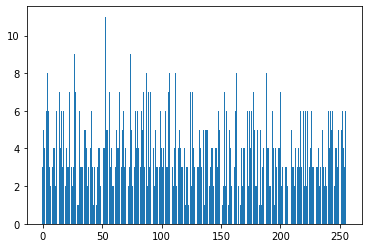

In [31]:
A = qs.Qcircuit(8) 
qa.Hardarmard_N(A,A.n_resister) # Hardarmard_N (quantum circuit, number of H-gates applied)
A.graph()
A.M_graph(A.Measure(1000)) # Visualization of 1000 measurements

### Deutsch - Jozsa Algorithm

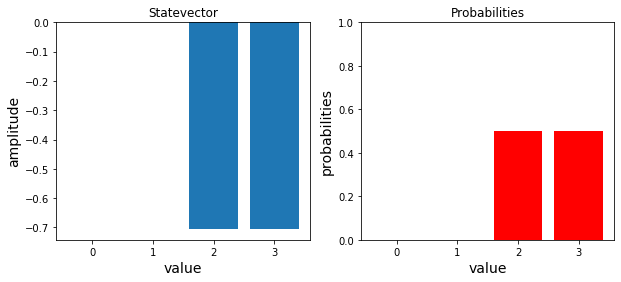

In [34]:
# Oracle
A = qs.Qcircuit(2)
def oracle(circuit):
    circuit.X(1)
    circuit.Z(0)
    circuit.CNOT(1,0)
# applying Deutsch - Jozsa Algorithm
A.X(1)
qa.Deutsch_Jozsa(A,oracle) 
A.graph()

* 2와 3 즉 "10"과 "11"이 나왔다. 0번째 큐비트가 1로 측정 되었음으로 즉 f(0) ⊕ f(1)=1이므로 오라클 함수는 균형함수이다.

### Grover Algoritm

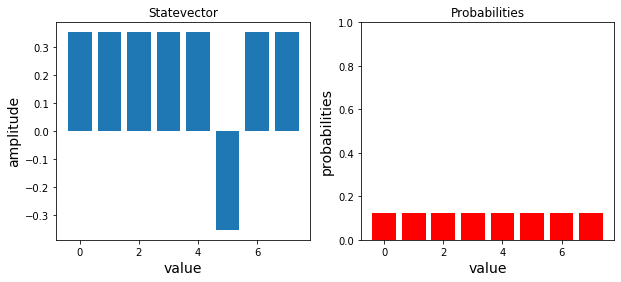

In [36]:
A = qs.Qcircuit(3) 
qa.Hardarmard_N(A,A.n_resister) 
A.base = qa.grover_oracle(A.base,'101') # Apply oracle function to find 5
A.graph()

* 그로버 알고리즘의 2번째 단계로써 찾고자 하는 값의 확률진폭이 성공적으로 음수로 바뀐것을 확인할 수 있다

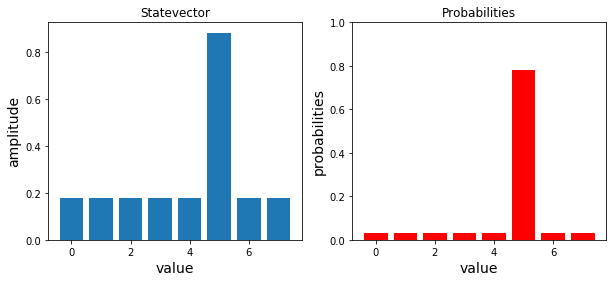

In [54]:
A = qs.Qcircuit(3) #
qa.Hardarmard_N(A,A.n_resister) 
A.base = qa.grover_algorithm(A.base,'101') # A function that can apply an Oracle function and a diffuser function at the same time
A.graph()

* 찾고자 하는 값인 5의 확률진폭이 다른 값들에 비해 눈에 띄게 높아졌다.

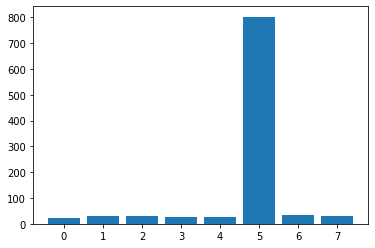

In [55]:
A.M_graph(A.Measure(1000))

* 1000번의 측정 결과